In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
#from datetime import datetime as dt

### *** Reference:***
> 1.	López de Prado, Marcos. (2018).  Advances in Financial Machine Learning. 1st Edition. New Jersey: Wiley. pp.23-29


In [33]:
def create_bar(dataframe, column_, units):
    _bars_ = dataframe.copy()
    if column_ == 'time_stamp':
        units_=units[0]
        units_frequency=units[1]
        _bars_= _bars_.resample(str(units_)+str(units_frequency), label='right').agg({"price":'ohlc',"volume":'sum','transaction':'sum'})
        _bars_.columns = _bars_.columns.droplevel()
        _bars_['vwap'] = _bars_['transaction']/_bars_['volume']
        
    else:
        if column_ == 'id':
            _bars_[column_] =1

        _bars_['filter'] = _bars_[column_].cumsum()
        _bars_['group']= 0
        n = 0
        _bars_['filter'] = _bars_['filter']/units
        _bars_['filter'] = _bars_['filter'].astype(int)
        _bars_['group']= _bars_['filter']
        _bars_ = _bars_.groupby('group').agg({"time_stamp":"last","price":'ohlc',"volume":'sum','transaction':'sum'})
        
        _bars_.columns = _bars_.columns.droplevel()
        _bars_['vwap'] = _bars_['transaction']/_bars_['volume']
        _bars_ = _bars_.set_index('time_stamp')

    _bars_ = _bars_.fillna(method='ffill')
    return _bars_

In [3]:
#path = os.getcwd()

In [41]:
path = '/Users/ravindra/WQU_Capstone_Project_Group_D/indices/'

In [60]:
data = pd.read_csv(path+'/Palladium Contract (PAU9).csv')
data = data.rename(columns={"Price":"price","Vol.":"volume","Date":'time_stamp'})
data =data[['time_stamp',"price","volume"]].copy()
data["volume"][data["volume"]=="-"]="0K"
data["volume"] = data["volume"].str.replace('K',"")
data["volume"]= data["volume"].apply(pd.to_numeric)

data['transaction'] = data['price'] * data['volume']

data =data.sort_values(by=['time_stamp'],ascending=[True])
# data.head()

data['time_stamp'] = pd.to_datetime(data['time_stamp'])
data.index = data['time_stamp']
data.head(2)


,time_stamp,price,volume,transaction
time_stamp,,,,
2004-01-25,2004-01-25,231.55,15.37,3558.9235
2004-02-25,2004-02-25,229.15,21.12,4839.6480


In [61]:
time_bars = create_bar(data, 'time_stamp', [1,'M'])
time_bars.to_csv(path+"/time_bars.csv")

In [63]:
time_bars.head()

,open,high,low,close,volume,transaction,vwap
time_stamp,,,,,,,
2004-01-31,231.55,231.55,231.55,231.55,15.37,3558.9235,231.55
2004-02-29,229.15,229.15,229.15,229.15,21.12,4839.6480,229.15
2004-03-31,289.95,289.95,289.95,289.95,3.19,924.9405,289.95
2004-04-30,258.30,258.30,258.30,258.30,28.77,7431.2910,258.30
2004-05-31,257.45,257.45,257.45,257.45,17.71,4559.4395,257.45


In [106]:
dollar_bars = create_bar(data, 'transaction', 30000)
dollar_bars.to_csv(path+"/dollar_bars.csv")

In [107]:
dollar_bars.head()

,open,high,low,close,volume,transaction,vwap
time_stamp,,,,,,,
2004-10-25,231.55,289.95,212.20,212.20,113.16,27122.2320,239.680382
2005-10-25,210.60,227.15,181.95,227.15,140.66,27125.5825,192.845034
2007-06-25,255.50,368.00,255.50,364.15,115.46,34606.4425,299.726680
2010-10-25,333.50,651.30,184.50,651.30,70.94,27023.3920,380.933070
2012-01-25,700.95,826.70,610.00,685.20,42.07,31161.7095,740.710946


In [108]:
volume_bars = create_bar(data, 'volume', 100)
volume_bars.to_csv(path+"/volume_bars.csv")

In [109]:
volume_bars.head()

,open,high,low,close,volume,transaction,vwap
time_stamp,,,,,,,
2004-07-25,231.55,289.95,214.95,217.20,95.73,23386.6365,244.297885
2005-06-25,214.30,225.85,181.95,181.95,101.97,19828.0780,194.450113
2005-12-25,194.60,261.50,181.95,261.50,86.59,18829.8250,217.459580
2009-01-25,296.95,571.95,184.50,184.50,114.96,38111.3090,331.517998
2012-04-25,194.85,826.70,194.85,683.50,91.14,52587.5800,576.997806


In [110]:
tick_bars = create_bar(data, 'id',5)
tick_bars.to_csv(path+"/tick_bars.csv")

In [111]:
tick_bars.head()

,open,high,low,close,volume,transaction,vwap
time_stamp,,,,,,,
2004-04-25,231.55,289.95,229.15,258.30,68.45,16754.8030,244.774332
2004-09-25,257.45,257.45,214.30,225.85,42.95,9993.9570,232.688172
2005-02-25,212.20,212.20,183.05,183.05,53.70,10472.2730,195.014395
2005-07-25,194.05,197.90,181.95,194.60,48.48,9083.9295,187.374783
2005-12-25,181.95,261.50,181.95,261.50,70.71,15739.5770,222.593367


> time series plots

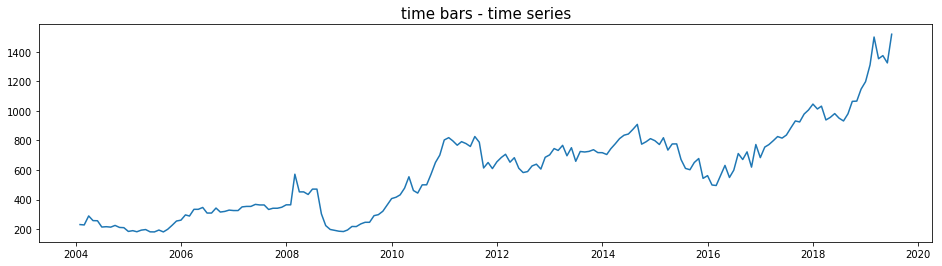

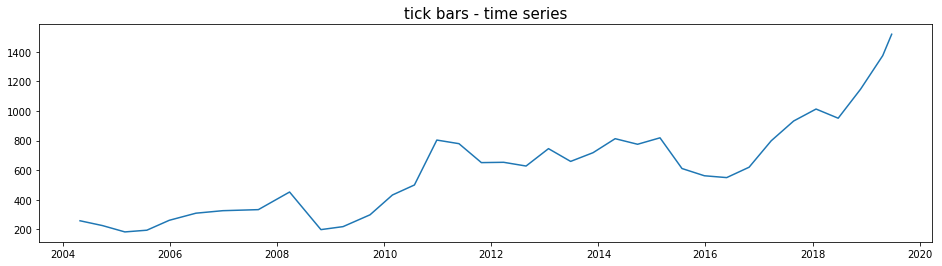

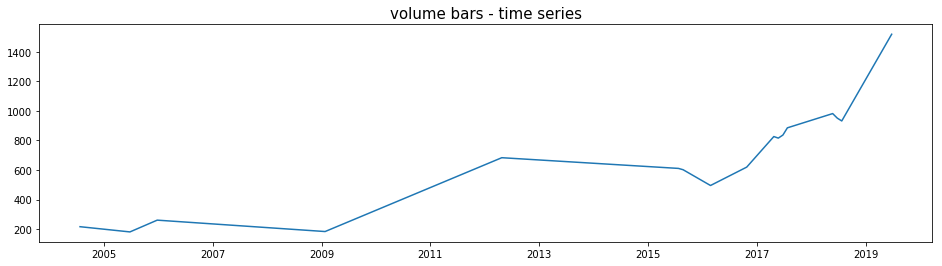

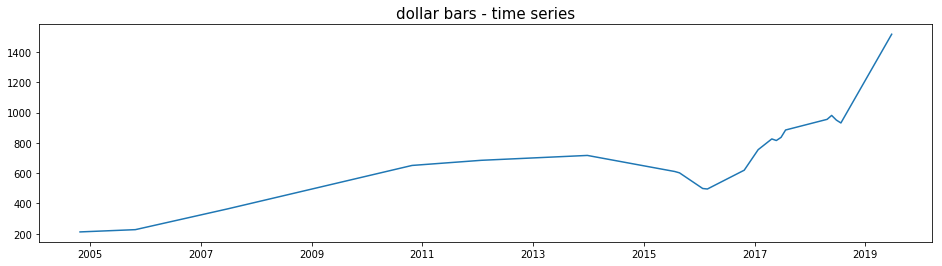

In [114]:
size_ = (16,4)
font_siz =15
plt.rcParams["figure.figsize"] = size_
plt.plot(time_bars['close'])
plt.title('time bars - time series', fontsize=font_siz)
plt.show()

size_ = (16,4)
font_siz =15
plt.rcParams["figure.figsize"] = size_
plt.plot(tick_bars['close'])
plt.title('tick bars - time series', fontsize=font_siz)
plt.show()

size_ = (16,4)
font_siz =15
plt.rcParams["figure.figsize"] = size_
plt.plot(volume_bars['close'])
plt.title('volume bars - time series', fontsize=font_siz)
plt.show()

size_ = (16,4)
font_siz =15
plt.rcParams["figure.figsize"] = size_
plt.plot(dollar_bars['close'])
plt.title('dollar bars - time series', fontsize=font_siz)
plt.show()


In [115]:
time_returns = np.log(time_bars['close']).diff().dropna()
tick_returns = np.log(tick_bars['close']).diff().dropna()
volume_returns = np.log(volume_bars['close']).diff().dropna()
dollar_returns = np.log(dollar_bars['close']).diff().dropna()

In [116]:
print ('Serial Correlation, or an Auto Correlation:')
print ('*  Time Bars: %s' %round(time_returns.autocorr(),4))
print ('*  Tick Bars: %s' %round(tick_returns.autocorr(),4))
print ('*  Volume Bars: %s' %round(volume_returns.autocorr(),4))
print ('*  Dollar Bars: %s' %round(dollar_returns.autocorr(),4))

Serial Correlation, or an Auto Correlation:
*  Time Bars: -0.0507
*  Tick Bars: 0.0125
*  Volume Bars: -0.4727
*  Dollar Bars: 0.3516


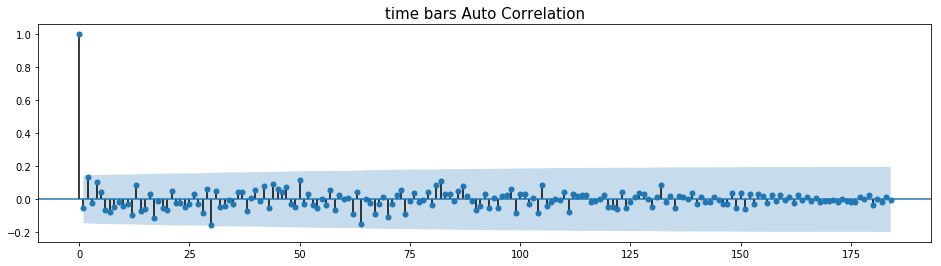

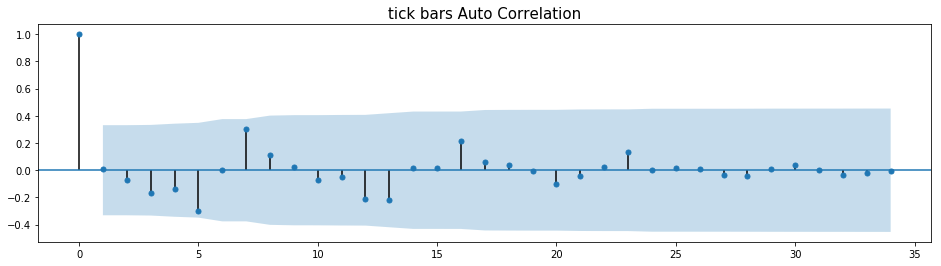

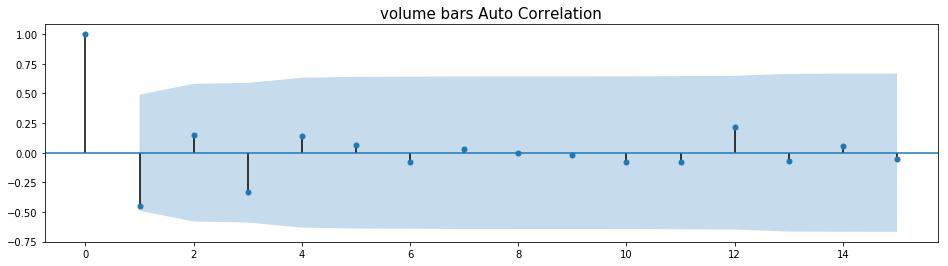

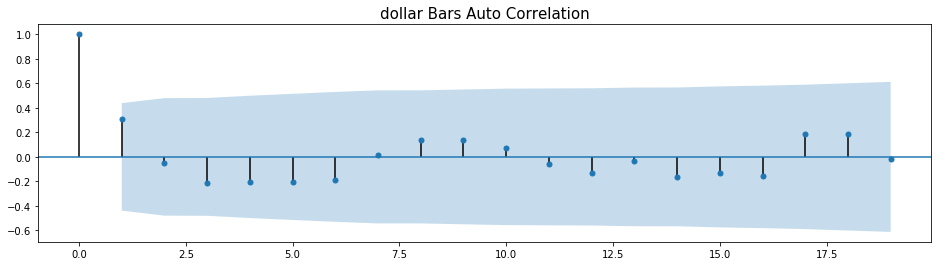

In [117]:
size_ = (16,4)
font_siz =15
plt.rcParams["figure.figsize"] = size_
plot_acf(time_returns)
plt.title('time bars Auto Correlation', fontsize=font_siz)
plt.show()

plt.rcParams["figure.figsize"] = size_
plot_acf(tick_returns)
plt.title('tick bars Auto Correlation', fontsize=font_siz)
plt.show()

plt.rcParams["figure.figsize"] = size_
plot_acf(volume_returns)
plt.title('volume bars Auto Correlation', fontsize=font_siz)
plt.show()

plt.rcParams["figure.figsize"] = size_
plot_acf(dollar_returns)
plt.title('dollar Bars Auto Correlation', fontsize=font_siz)
plt.show()

In [118]:
print ('Jarque-Bera normality test statistics:')
print ('*   Time Bars: %s' %round(stats.jarque_bera(time_returns)[0],2))
print ('*   Tick Bars: %s' %round(stats.jarque_bera(tick_returns)[0],2))
print ('*   Volume Bars: %s' %round(stats.jarque_bera(volume_returns)[0],2))
print ('*   Dollar Bars: %s' %round(stats.jarque_bera(dollar_returns)[0],2))

Jarque-Bera normality test statistics:
*   Time Bars: 171.06
*   Tick Bars: 44.34
*   Volume Bars: 19.81
*   Dollar Bars: 4.57


In [119]:
print ("According to Fisher for normal distribution skewness  should be around 0.03. The kurtosis should be 2.96 \n")

print ('*   Time Bars: Skewness = %s , Kurtosis = %s \n' %(round(stats.skew(time_returns),2),round(stats.kurtosis(time_returns,fisher=False),2)))

print ('*   Tick Bars: Skewness = %s , Kurtosis = %s \n' %(round(stats.skew(tick_returns),2),round(stats.kurtosis(tick_returns,fisher=False),2)))

print ('*   Volume Bar: Skewness = %s , Kurtosis = %s \n' %(round(stats.skew(volume_returns),2),round(stats.kurtosis(volume_returns,fisher=False),2)))

print ('*   Dollar Bars: Skewness = %s , Kurtosis = %s \n' %(round(stats.skew(dollar_returns),2),round(stats.kurtosis(dollar_returns,fisher=False),2)))

np.random.seed(0)
norm_dist = np.random.normal(size=10000)

print ('*   Random Normal Distribution: Skewwness = %s , Kurtosis = %s \n' %(round(stats.skew(norm_dist),2),round(stats.kurtosis(norm_dist,fisher=False),2)))


According to Fisher for normal distribution skewness  should be around 0.03. The kurtosis should be 2.96 

*   Time Bars: Skewness = -0.47 , Kurtosis = 7.62 

*   Tick Bars: Skewness = -1.49 , Kurtosis = 7.65 

*   Volume Bar: Skewness = 1.91 , Kurtosis = 6.89 

*   Dollar Bars: Skewness = 1.14 , Kurtosis = 3.55 

*   Random Normal Distribution: Skewwness = 0.03 , Kurtosis = 2.97 



<font color='black'>

======================================================================================================================
 ### Visual Inspection of Normality: 
====================================================================================================================== 


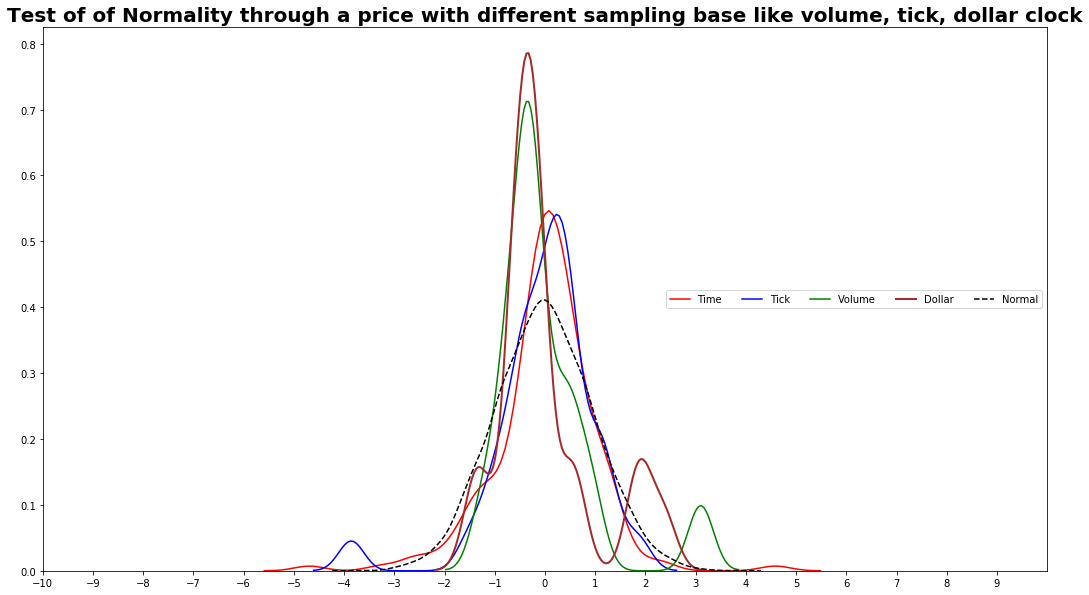

In [120]:
#Standardizing data

time_standard = (time_returns - time_returns.mean()) / time_returns.std()
tick_standard = (tick_returns - tick_returns.mean()) / tick_returns.std()
volume_standard = (volume_returns - volume_returns.mean()) / volume_returns.std()
dollar_standard = (dollar_returns - dollar_returns.mean()) / dollar_returns.std()
plt.figure(figsize=(18,10))
sns.kdeplot(time_standard, label="Time", bw=0.30, color='red',linestyle="-")
sns.kdeplot(tick_standard, label="Tick", bw=0.25, color='blue')
sns.kdeplot(volume_standard, label="Volume", bw=0.25, color='green')
sns.kdeplot(dollar_standard, label="Dollar", bw=0.25, linewidth=2, color='brown')

sns.kdeplot(norm_dist, label="Normal", color='black', linestyle="--")

plt.xticks(range(-10, 10))
plt.legend(loc=7, ncol=9)
plt.title('Test of of Normality through a price with different sampling base like volume, tick, dollar clock',
          loc='center', fontsize=20, fontweight="bold")
plt.xlim(-10, 10)
plt.show()